In [ ]:
import io
from IPython.nbformat import current

def execute_notebook(nbfile):
    
    with io.open(nbfile) as f:
        nb = current.read(f, 'json')
    
    ip = get_ipython()
    
    for cell in nb.worksheets[0].cells:
        if cell.cell_type != 'code':
            continue
        ip.run_cell(cell.input)
execute_notebook("../workers/Imports.ipynb")

## Deep corner 3s

What is the optimal place to aim? How far are we from that? What is the percentage loss compared to other spots?

In [2]:
prof_df = pd.read_csv('../../processed_data/professional.csv', index_col=0)

//anaconda/lib/python2.7/site-packages/numpy/lib/arraysetops.py:379: FutureWarning: elementwise comparison failed; returning scalar instead, but in the future will perform elementwise comparison
  mask |= (ar1 == a)


In [3]:
# Remove any unlabled shots
prof_df = prof_df[prof_df.player_id != 0]

In [11]:
distance_x, distance_y = 22, 25
df_ = prof_df[(prof_df.shot_distance > distance_x)&(prof_df.shot_distance <= distance_y)]

(-12, 12)

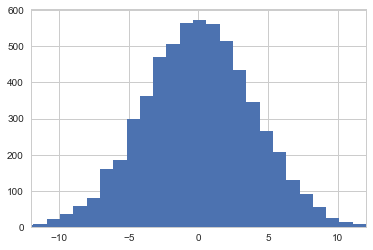

In [38]:
pd.Series(np.random.normal(0, 4, 6000)).hist(bins=30)
plt.xlim(-12, 12)

2677 4.31367811551 0.41222603427


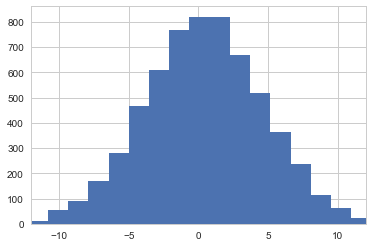

3343 3.93911250275 -0.444122490843


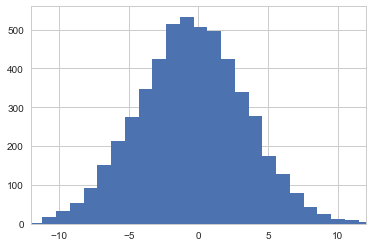

110 4.39932488326 -0.514675289707


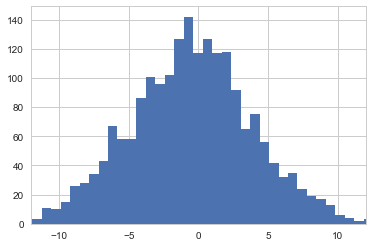

17667 4.07743354197 0.239880977071


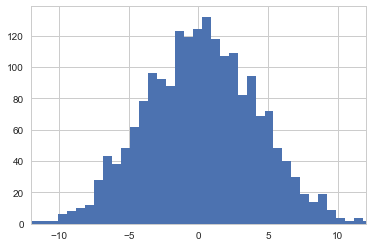

111 4.40489882268 0.32635362469


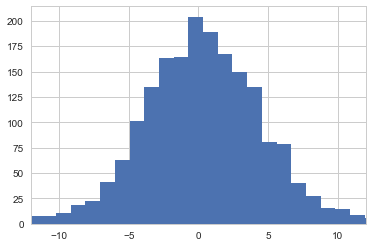

2464 3.56605339775 -0.00278721542202


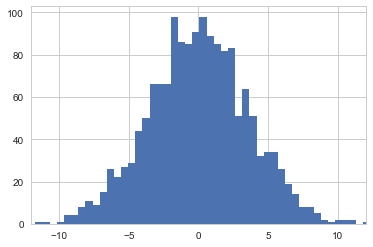

3225 3.70614343379 -0.320589199893


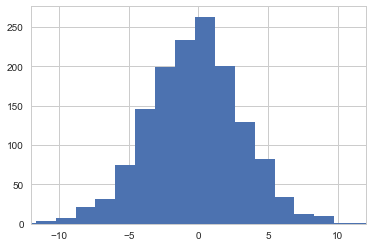

94 4.33044670135 -0.103791414019


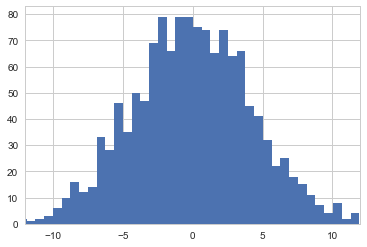

93 4.8536908979 -0.41043560933


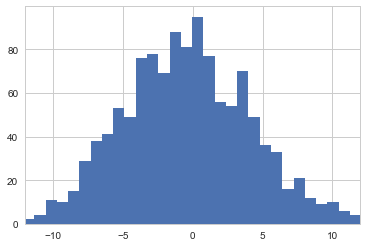

20888 3.42689758261 0.439971936609


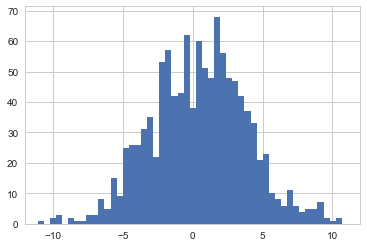

In [21]:
# Review player distributions to ensure they are normally distributed
for player in df_.player_id.value_counts().index[:10]:
    print player, df_[df_.player_id == player].left_right.std(), df_[df_.player_id == player].left_right.mean()
    df_[df_.player_id == player].left_right.hist(bins=50)
    plt.xlim(-12, 12)
    plt.show()
    plt.clf()

## Assess percentage made at different distributions

In [39]:
df = pd.read_csv('../../processed_data/deep_corner.csv', index_col=0)

//anaconda/lib/python2.7/site-packages/IPython/core/interactiveshell.py:2717: DtypeWarning: Columns (23,27,45) have mixed types. Specify dtype option on import or set low_memory=False.
  interactivity=interactivity, compiler=compiler, result=result)


In [95]:
# Right corner
left_right_order =  [str(x) for x in np.arange(-10, 10.5, 0.5)]

x_min, x_max, y_min, y_max = -25, -22, -4, 0
df_ = df[(df.floor_position_x_feet > x_min)&(df.floor_position_x_feet <= x_max)&
             (df.floor_position_y_feet > y_min)&(df.floor_position_y_feet <= y_max)]

df_['left_right_rounded'] = df_['left_right'].apply(round_half)
left_right_perc_df = df_[['left_right_rounded', 'make_miss_int']].groupby('left_right_rounded').mean().reset_index()
left_right_perc_df['left_right_rounded'] = pd.Categorical(left_right_perc_df.left_right_rounded, left_right_order)
left_right_perc_df = left_right_perc_df.sort_values('left_right_rounded')
left_right_perc_df = left_right_perc_df[left_right_perc_df.left_right_rounded.isin(left_right_order)]

means, percentages = [], []
for mean in np.arange(-3.0, 3.0, 0.5):
    sample_values = [round_half(x) for x in list(pd.Series(np.random.normal(mean, 4, 10000)))]

    sum = 0
    for value in sample_values:
        if float(value) >= -10.0 and float(value) <= 10:
            if value == '-0.0':
                sum += list(left_right_perc_df[left_right_perc_df.left_right_rounded == '0.0'].make_miss_int)[0]
            else:
                sum += list(left_right_perc_df[left_right_perc_df.left_right_rounded == value].make_miss_int)[0]
    percentage = float(sum)/len(sample_values)
    print mean, percentage
    means.append(mean)
    percentages.append(percentage)

right_corner = pd.DataFrame({'Mean': means, 'Percentages': percentages})

/anaconda/lib/python2.7/site-packages/ipykernel/__main__.py:8: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/indexing.html#indexing-view-versus-copy


-3.0 0.476955334973
-2.5 0.500947860555
-2.0 0.526327747086
-1.5 0.53634559378
-1.0 0.552049824044
-0.5 0.559031706544
0.0 0.560837771636
0.5 0.559794995902
1.0 0.552116504881
1.5 0.541864505605
2.0 0.525046528858
2.5 0.500334687241


In [94]:
# Left corner
left_right_order =  [str(x) for x in np.arange(-10, 10.5, 0.5)]

x_min, x_max, y_min, y_max = -25, -22, -4, -2
df_ = df[(df.floor_position_x_feet > x_min)&(df.floor_position_x_feet <= x_max)&
             (df.floor_position_y_feet > y_min)&(df.floor_position_y_feet <= y_max)]

df_['left_right_rounded'] = df_['left_right'].apply(round_half)
left_right_perc_df = df_[['left_right_rounded', 'make_miss_int']].groupby('left_right_rounded').mean().reset_index()
left_right_perc_df['left_right_rounded'] = pd.Categorical(left_right_perc_df.left_right_rounded, left_right_order)
left_right_perc_df = left_right_perc_df.sort_values('left_right_rounded')
left_right_perc_df = left_right_perc_df[left_right_perc_df.left_right_rounded.isin(left_right_order)]

means, percentages = [], []
for mean in np.arange(-3.0, 3.0, 0.5):
    sample_values = [round_half(x) for x in list(pd.Series(np.random.normal(mean, 4, 10000)))]

    sum = 0
    for value in sample_values:
        if float(value) >= -10.0 and float(value) <= 10:
            if value == '-0.0':
                sum += list(left_right_perc_df[left_right_perc_df.left_right_rounded == '0.0'].make_miss_int)[0]
            else:
                sum += list(left_right_perc_df[left_right_perc_df.left_right_rounded == value].make_miss_int)[0]
    percentage = float(sum)/len(sample_values)
    print mean, percentage
    means.append(mean)
    percentages.append(percentage)

left_corner = pd.DataFrame({'Mean': means, 'Percentages': percentages})

/anaconda/lib/python2.7/site-packages/ipykernel/__main__.py:8: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/indexing.html#indexing-view-versus-copy


-3.0 0.475205534516
-2.5 0.498205671888
-2.0 0.516275363818
-1.5 0.538628012032
-1.0 0.547074880385
-0.5 0.548830678955
0.0 0.551843200395
0.5 0.550892429856
1.0 0.542101245634
1.5 0.525716136828
2.0 0.515293816562
2.5 0.495531481999


In [96]:
right_corner

,Mean,Percentages
0,-3.0,0.476955
1,-2.5,0.500948
2,-2.0,0.526328
3,-1.5,0.536346
4,-1.0,0.552050
5,-0.5,0.559032
6,0.0,0.560838
7,0.5,0.559795
8,1.0,0.552117
9,1.5,0.541865


In [97]:
left_corner

,Mean,Percentages
0,-3.0,0.475206
1,-2.5,0.498206
2,-2.0,0.516275
3,-1.5,0.538628
4,-1.0,0.547075
5,-0.5,0.548831
6,0.0,0.551843
7,0.5,0.550892
8,1.0,0.542101
9,1.5,0.525716
